In [1]:
%matplotlib inline
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from lob_data_utils.roc_results import results_10000 as results
from lob_data_utils import lob

In [2]:
response = requests.get('http://localhost:8000/result/')
rec = []
for r in response.json():
    if r.get('data_length') == 10000:
        svm = r.get('algorithm').get('svm')
        rec.append({
            'kernel': svm.get('kernel'),
            'c': svm.get('c'),
            'gamma': svm.get('gamma'),
            'coef0': svm.get('coef0'),
            'roc_auc_score': r.get('roc_auc_score'),
            'stock': r.get('stock')
        })
df = pd.DataFrame(rec)

In [3]:
len(df)

14442

In [4]:
log_res = []
for i, row in df.iterrows():
    log_res.append(results.get(row['stock']))
df['log_res'] = log_res
df['diff'] = df['roc_auc_score'] - log_res

In [5]:
print(len(df['stock'].unique()))
print(len(df[df['log_res'] < df['roc_auc_score']]['stock'].unique()))

50
48


In [6]:
df[df['log_res'] <= df['roc_auc_score']]

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff
121,0.500,0.0000,0.5000,rbf,0.562076,10166,0.561092,9.840630e-04
129,0.500,0.0000,5.0000,rbf,0.561092,10166,0.561092,4.440892e-16
137,0.500,0.0000,50.0000,rbf,0.562060,10166,0.561092,9.680620e-04
178,5.000,0.0000,5.0000,rbf,0.561092,10166,0.561092,4.440892e-16
186,5.000,0.0000,50.0000,rbf,0.562060,10166,0.561092,9.680620e-04
227,50.000,0.0000,5.0000,rbf,0.561092,10166,0.561092,4.440892e-16
235,50.000,0.0000,50.0000,rbf,0.562060,10166,0.561092,9.680620e-04
284,500.000,0.0000,50.0000,rbf,0.562060,10166,0.561092,9.680620e-04
391,0.005,0.0000,-1.0000,linear,0.559418,9061,0.557542,1.876689e-03
407,0.500,0.0000,0.0050,rbf,0.560084,9061,0.557542,2.542288e-03


In [7]:
df.groupby('stock').aggregate({'roc_auc_score': np.max}).head()

,roc_auc_score
stock,
10166,0.562076
10484,0.558058
10508,0.574945
10887,0.568068
1113,0.574734


In [8]:
bests = []
df_best_agg = df.groupby('stock', as_index=False)['diff'].idxmax()
df_bests = df.loc[df_best_agg]
df_bests.index = df_bests['stock']

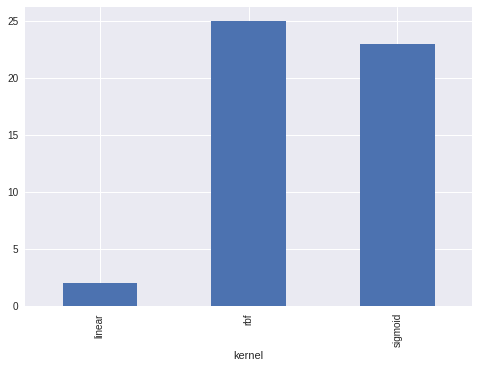

In [9]:
df_bests.groupby('kernel')['kernel'].count().plot(kind='bar')

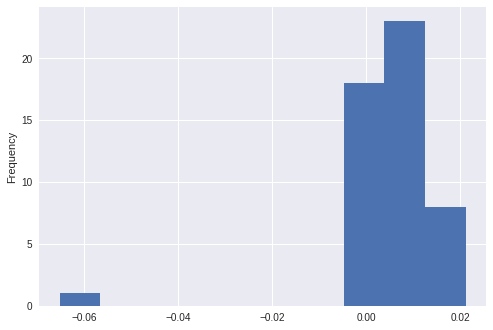

In [10]:
df_bests['diff'].plot(kind='hist')

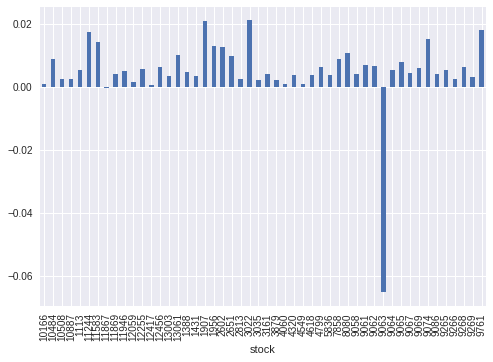

In [11]:
df_bests['diff'].plot(kind='bar')

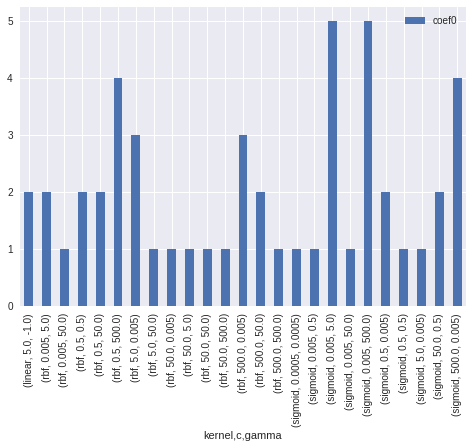

In [12]:
df_bests.groupby(['kernel', 'c', 'gamma'])[['coef0']].count().plot(kind='bar')

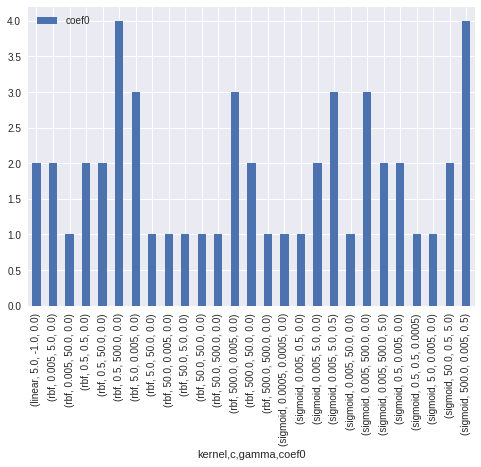

In [13]:
df_bests.groupby(['kernel', 'c', 'gamma', 'coef0'])[['coef0']].count().plot(kind='bar')

In [14]:
# TODO: mean square error by kernel for the bests? or for all


In [15]:
print(df_bests[df_bests['kernel'] == 'rbf']['diff'].median())
print(df_bests[df_bests['kernel'] == 'sigmoid']['diff'].median())
print(df_bests[df_bests['kernel'] == 'linear']['diff'].median())

0.00540337711069383
0.004038954854149734
0.0027754472245894446


In [16]:
print(df_bests[df_bests['kernel'] == 'rbf']['diff'].std())
print(df_bests[df_bests['kernel'] == 'sigmoid']['diff'].std())
print(df_bests[df_bests['kernel'] == 'linear']['diff'].std())

0.004659717137686799
0.016195727242391298
0.0017909500125403233


In [17]:
print(df_bests[df_bests['kernel'] == 'rbf']['diff'].mean())
print(df_bests[df_bests['kernel'] == 'sigmoid']['diff'].mean())
print(df_bests[df_bests['kernel'] == 'linear']['diff'].mean())

0.006443065591162465
0.003830861283322073
0.0027754472245894446


In [18]:
print(df_bests[df_bests['kernel'] == 'rbf'][df_bests['diff'] < 0]['diff'].mean())
print(df_bests[df_bests['kernel'] == 'sigmoid'][df_bests['diff'] < 0]['diff'].mean())
print(df_bests[df_bests['kernel'] == 'linear'][df_bests['diff'] < 0]['diff'].mean())

-0.0003331746787240686
-0.06523419818217513
nan


In [19]:
print(df_bests[df_bests['kernel'] == 'rbf'][df_bests['diff'] < 0]['diff'].min())
print(df_bests[df_bests['kernel'] == 'sigmoid'][df_bests['diff'] < 0]['diff'].min())
print(df_bests[df_bests['kernel'] == 'linear'][df_bests['diff'] < 0]['diff'].min())

-0.000333174678724
-0.0652341981822
nan


In [20]:
df_roc = pd.DataFrame()
df_roc['stock'] = results.keys()
df_roc['roc_area'] = results.values()

df_roc = df_roc.sort_values(by='roc_area', ascending=False)

dfs = {}
dfs_test = {}
dfs_cv = {}
stocks = df_roc['stock'].values

for s in stocks:
    d, d_cv, d_test = lob.load_prepared_data(
        s, cv=True, data_dir='../data/prepared/', length=10000)
    dfs[s] = d
    dfs_cv[s] = d_cv
    dfs_test[s] = d_test

Len of data for  2028 is 6279
Training set length for 2028: 3769
Testing set length for 2028: 1255
Cross-validation set length for 2028: 1255
Len of data for  12098 is 5986
Training set length for 12098: 3592
Testing set length for 12098: 1197
Cross-validation set length for 12098: 1197
Len of data for  12552 is 9049
Training set length for 12552: 5431
Testing set length for 12552: 1809
Cross-validation set length for 12552: 1809
Len of data for  1221 is 6355
Training set length for 1221: 3813
Testing set length for 1221: 1271
Cross-validation set length for 1221: 1271
Len of data for  3459 is 7639
Training set length for 3459: 4585
Testing set length for 3459: 1527
Cross-validation set length for 3459: 1527
Len of data for  2748 is 5489
Training set length for 2748: 3295
Testing set length for 2748: 1097
Cross-validation set length for 2748: 1097
Len of data for  10795 is 7492
Training set length for 10795: 4496
Testing set length for 10795: 1498
Cross-validation set length for 10795:

Len of data for  1113 is 11967
Training set length for 1113: 6000
Testing set length for 1113: 2000
Cross-validation set length for 1113: 2000
Len of data for  2368 is 6928
Training set length for 2368: 4158
Testing set length for 2368: 1385
Cross-validation set length for 2368: 1385
Len of data for  1388 is 14534
Training set length for 1388: 6000
Testing set length for 1388: 2000
Cross-validation set length for 1388: 2000
Len of data for  2602 is 12538
Training set length for 2602: 6000
Testing set length for 2602: 2000
Cross-validation set length for 2602: 2000
Len of data for  3022 is 11912
Training set length for 3022: 6000
Testing set length for 3022: 2000
Cross-validation set length for 3022: 2000
Len of data for  13113 is 8972
Training set length for 13113: 5384
Testing set length for 13113: 1794
Cross-validation set length for 13113: 1794
Len of data for  10887 is 14032
Training set length for 10887: 6000
Testing set length for 10887: 2000
Cross-validation set length for 10887

In [21]:
df_roc = pd.DataFrame()
df_roc['stock'] = [s for s in results.keys() if s in stocks]
df_roc['roc_area'] = [results[s] for s in results.keys() if s in stocks]
df_roc = df_roc.sort_values(by='roc_area', ascending=False)
df_roc.head()

,stock,roc_area
94,2028,0.618053
26,12098,0.612709
64,12552,0.612281
16,1221,0.612020
70,3459,0.609925


In [22]:
df_summary = pd.DataFrame(index=stocks)
sum_sell_ask_mean = []
sum_buy_bid_mean = []
max_trade_price = []
min_trade_price = []
bid_ask_spread = []
pearson_corrs1 = []
pearson_corrs2 = []
bid_len = []
ask_len = []

from scipy.stats import pearsonr
for s in stocks:
    sum_sell_ask_mean.append(dfs[s]['sum_sell_ask'].mean())
    sum_buy_bid_mean.append(dfs[s]['sum_buy_bid'].mean())
    max_trade_price.append(max( dfs[s]['bid_price'].max(), dfs[s]['ask_price'].max()))
    min_trade_price.append(max( dfs[s]['bid_price'].min(), dfs[s]['ask_price'].min()))
    bid_ask_spread.append((dfs[s]['ask_price'] - dfs[s]['bid_price']).mean())
    p1, p2 = pearsonr(dfs[s]['queue_imbalance'], dfs[s]['mid_price'])
    pearson_corrs1.append(p1)
    pearson_corrs2.append(p2)
    max_len_bid = 0
    max_len_ask = 0
    for i, row in dfs[s].iterrows():
        if len(row['bid']) > max_len_bid:
            max_len_bid = len(row['bid'])
        if len(row['ask']) > max_len_ask:
            max_len_ask = len(row['ask'])

    bid_len.append(max_len_bid)
    ask_len.append(max_len_ask)
df_summary['roc_area'] = df_roc['roc_area'].values
df_summary['sum_sell_ask_mean'] = sum_sell_ask_mean
df_summary['sum_buy_bid_mean'] = sum_buy_bid_mean
df_summary['diff_mean_bid_ask'] = df_summary['sum_sell_ask_mean'] - df_summary['sum_buy_bid_mean']
df_summary['max_trade_price'] = max_trade_price
df_summary['min_trade_price'] = min_trade_price
df_summary['diff_trade_price'] = df_summary['max_trade_price'] - df_summary['min_trade_price']
df_summary['bid_ask_spread'] = bid_ask_spread
df_summary['pearson_corr1'] = pearson_corrs1
df_summary['pearson_corr2'] = pearson_corrs2
df_summary['len_ask'] = ask_len
df_summary['len_bid'] = bid_len

df_summary.sort_values(by='bid_ask_spread')[df_summary['roc_area'] >= 0.58].head()


,roc_area,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid
2028,0.618053,37033.623242,38876.612895,-1842.989652,130.3,116.7,13.6,0.142001,0.029846,6.693353e-02,1138,1002
2890,0.588719,16750.638548,15403.593850,1347.044698,202.5,173.2,29.3,0.153151,0.085788,3.385574e-11,915,886
1956,0.580344,7440.167167,8133.749667,-693.582500,306.4,273.4,33.0,0.153583,0.114895,4.358453e-19,1040,846
3035,0.584046,6137.580500,5560.049667,577.530833,262.0,235.9,26.1,0.194967,0.059406,4.131468e-06,810,717
12552,0.612281,1541.183576,1520.387590,20.795986,512.0,473.8,38.2,0.255331,0.005403,6.905735e-01,669,652


In [23]:
df_bests.sort_index(inplace=True)
df_summary.sort_index(inplace=True)
df_all = df_bests.join(df_summary)
diff_ind = []
for i, r in df_bests.iterrows():
    if r['diff'] <= 0:
        diff_ind.append(0)
    else:
        diff_ind.append(1)
df_all['diff_ind'] = diff_ind

In [24]:
df_all.head()

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff,roc_area,sum_sell_ask_mean,...,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid,diff_ind
stock,,,,,,,,,,,,,,,,,,,,,
10166,0.500,0.0000,0.500,rbf,0.562076,10166,0.561092,0.000984,0.561092,800.550333,...,-60.278167,3454.5,2968.5,486.0,1.195917,0.009147,4.786802e-01,1222,1446,1
10484,0.500,0.0005,0.500,sigmoid,0.558058,10484,0.549233,0.008825,0.549233,2717.582500,...,-93.238833,358.4,316.2,42.2,0.288167,0.093252,4.570038e-13,740,682,1
10508,0.005,0.0000,5.000,sigmoid,0.574945,10508,0.572313,0.002632,0.572313,3710.705500,...,-152.311000,378.8,341.3,37.5,0.241700,-0.061503,1.864793e-06,719,817,1
10887,50.000,5.0000,0.500,sigmoid,0.568068,10887,0.565510,0.002558,0.565510,4167.200333,...,127.070833,348.8,307.8,41.0,0.235467,0.057938,7.097901e-06,993,998,1
1113,500.000,0.0000,0.005,rbf,0.574734,1113,0.569331,0.005403,0.569331,2434.107500,...,-133.827500,932.5,806.5,126.0,0.977417,-0.092957,5.412841e-13,878,837,1


In [25]:
df_summary.head()

,roc_area,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid
10166,0.561092,800.550333,860.828500,-60.278167,3454.5,2968.5,486.0,1.195917,0.009147,4.786802e-01,1222,1446
10470,0.596423,951.811200,1089.178571,-137.367372,2510.0,2208.0,302.0,1.712552,0.040252,2.231324e-03,737,717
10484,0.549233,2717.582500,2810.821333,-93.238833,358.4,316.2,42.2,0.288167,0.093252,4.570038e-13,740,682
10508,0.572313,3710.705500,3863.016500,-152.311000,378.8,341.3,37.5,0.241700,-0.061503,1.864793e-06,719,817
10795,0.604663,2345.858763,2034.958852,310.899911,1644.0,1440.0,204.0,1.571397,-0.029759,4.601041e-02,597,598


In [26]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 10166 to 9926
Data columns (total 12 columns):
roc_area             98 non-null float64
sum_sell_ask_mean    98 non-null float64
sum_buy_bid_mean     98 non-null float64
diff_mean_bid_ask    98 non-null float64
max_trade_price      98 non-null float64
min_trade_price      98 non-null float64
diff_trade_price     98 non-null float64
bid_ask_spread       98 non-null float64
pearson_corr1        98 non-null float64
pearson_corr2        98 non-null float64
len_ask              98 non-null int64
len_bid              98 non-null int64
dtypes: float64(10), int64(2)
memory usage: 12.5+ KB


In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["sigmoid", "linear", "rbf"])
df_all['kernel_class'] = le.transform(df_all['kernel'])
df_all.head()

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff,roc_area,sum_sell_ask_mean,...,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid,diff_ind,kernel_class
stock,,,,,,,,,,,,,,,,,,,,,
10166,0.500,0.0000,0.500,rbf,0.562076,10166,0.561092,0.000984,0.561092,800.550333,...,3454.5,2968.5,486.0,1.195917,0.009147,4.786802e-01,1222,1446,1,1
10484,0.500,0.0005,0.500,sigmoid,0.558058,10484,0.549233,0.008825,0.549233,2717.582500,...,358.4,316.2,42.2,0.288167,0.093252,4.570038e-13,740,682,1,2
10508,0.005,0.0000,5.000,sigmoid,0.574945,10508,0.572313,0.002632,0.572313,3710.705500,...,378.8,341.3,37.5,0.241700,-0.061503,1.864793e-06,719,817,1,2
10887,50.000,5.0000,0.500,sigmoid,0.568068,10887,0.565510,0.002558,0.565510,4167.200333,...,348.8,307.8,41.0,0.235467,0.057938,7.097901e-06,993,998,1,2
1113,500.000,0.0000,0.005,rbf,0.574734,1113,0.569331,0.005403,0.569331,2434.107500,...,932.5,806.5,126.0,0.977417,-0.092957,5.412841e-13,878,837,1,1


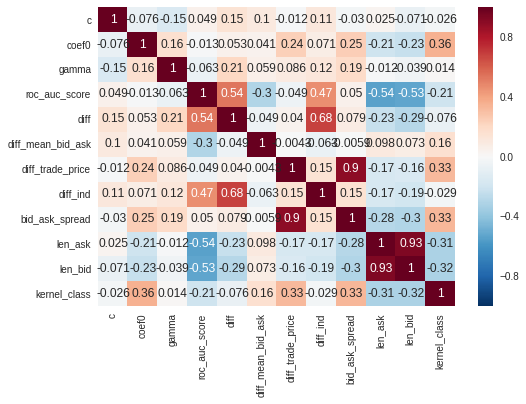

In [28]:
features = ['c', 'coef0', 'gamma', 'roc_auc_score', 'diff', 
            'diff_mean_bid_ask', 'diff_trade_price', 'diff_ind',
            'bid_ask_spread', 'len_ask', 'len_bid', 'kernel_class']

sns.heatmap(df_all[features].corr(), annot=True)

## Clustering

In [29]:
data_lens = []
for s in df_all.index:
    data_lens.append(len(dfs[s]))
df_all['data_len'] = data_lens
df_all.head()

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff,roc_area,sum_sell_ask_mean,...,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid,diff_ind,kernel_class,data_len
stock,,,,,,,,,,,,,,,,,,,,,
10166,0.500,0.0000,0.500,rbf,0.562076,10166,0.561092,0.000984,0.561092,800.550333,...,2968.5,486.0,1.195917,0.009147,4.786802e-01,1222,1446,1,1,6000
10484,0.500,0.0005,0.500,sigmoid,0.558058,10484,0.549233,0.008825,0.549233,2717.582500,...,316.2,42.2,0.288167,0.093252,4.570038e-13,740,682,1,2,6000
10508,0.005,0.0000,5.000,sigmoid,0.574945,10508,0.572313,0.002632,0.572313,3710.705500,...,341.3,37.5,0.241700,-0.061503,1.864793e-06,719,817,1,2,6000
10887,50.000,5.0000,0.500,sigmoid,0.568068,10887,0.565510,0.002558,0.565510,4167.200333,...,307.8,41.0,0.235467,0.057938,7.097901e-06,993,998,1,2,6000
1113,500.000,0.0000,0.005,rbf,0.574734,1113,0.569331,0.005403,0.569331,2434.107500,...,806.5,126.0,0.977417,-0.092957,5.412841e-13,878,837,1,1,6000


In [30]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
a_features = ['len_bid', 'len_ask', 'bid_ask_spread',
            'max_trade_price', 'min_trade_price', 'sum_sell_ask_mean',
           'sum_buy_bid_mean']

features = ['len_bid', 'len_ask', 
           'sum_sell_ask_mean', 'sum_buy_bid_mean']

X = df_all[features]

kmeans = KMeans(n_clusters=2, random_state=None).fit_predict(X)
df_all['del'] = kmeans

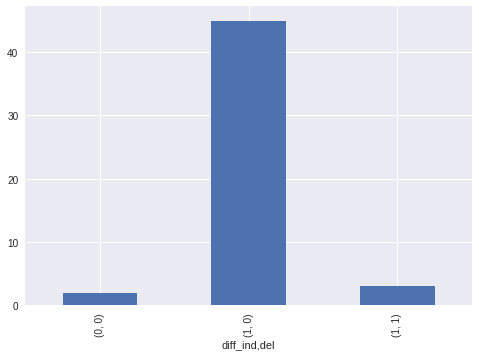

In [31]:
df_all.groupby(['diff_ind', 'del'])['del'].count().plot(kind='bar')

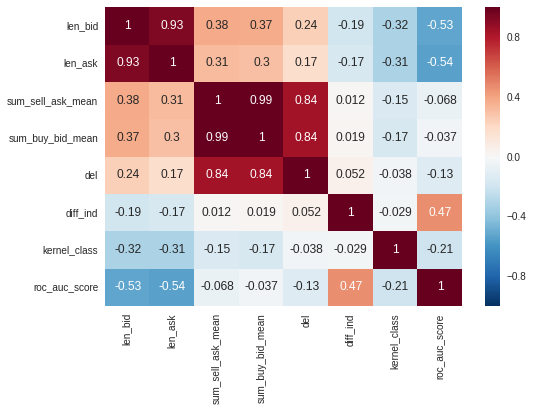

In [32]:

sns.heatmap(df_all[features + ['del', 'diff_ind', 'kernel_class', 'roc_auc_score' ]].corr(), 
            annot=True)

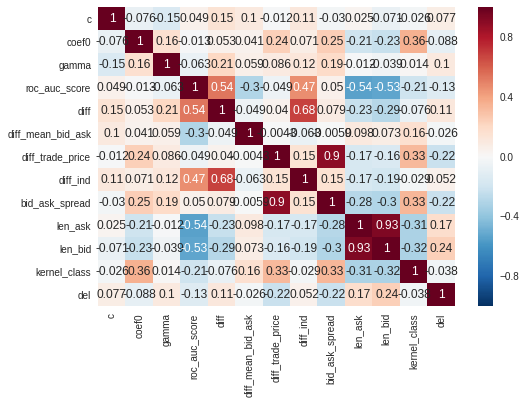

In [33]:
features = ['c', 'coef0', 'gamma', 'roc_auc_score', 'diff', 
            'diff_mean_bid_ask', 'diff_trade_price', 'diff_ind',
            'bid_ask_spread', 'len_ask', 'len_bid', 'kernel_class', 'del']
sns.heatmap(df_all[features].corr(), annot=True)

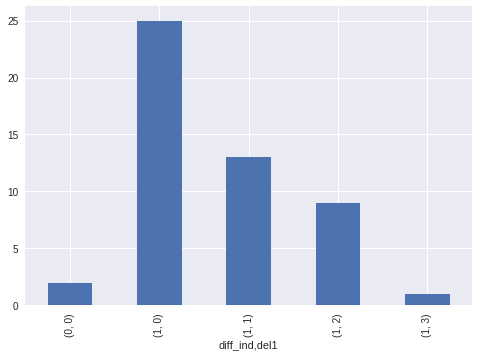

In [34]:
from sklearn.cluster import SpectralClustering, MeanShift, AffinityPropagation 
from sklearn.decomposition import PCA
a_features = ['len_bid', 'len_ask', 'bid_ask_spread', 
            'max_trade_price', 'min_trade_price', 'sum_sell_ask_mean',
           'sum_buy_bid_mean']
features = [  'bid_ask_spread', 
            ]

X = df_all[features]

kmeans = MeanShift().fit_predict(X)
df_all['del1'] = kmeans
df_all.groupby(['diff_ind', 'del1'])['del1'].count().plot(kind='bar')

### Check bad ones

In [35]:
f = ['sum_sell_ask_mean', 'sum_buy_bid_mean',
       'diff_mean_bid_ask', 'max_trade_price', 'min_trade_price',
       'diff_trade_price', 'bid_ask_spread', 'pearson_corr1', 'pearson_corr2',
       'len_ask', 'len_bid', 'data_len']
worst_row = df_all[f][df_all['diff'] < 0]
worst_stocks = worst_row.index
worst_row

,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid,data_len
stock,,,,,,,,,,,,
11867,2460.5315,2779.230333,-318.698833,409.5,361.50,48.00,0.286067,0.017387,0.178112,872,936,6000
9063,7812.6960,7045.713667,766.982333,468.0,427.05,40.95,0.096008,-0.053751,0.000031,2603,2535,6000


In [36]:
df_all[f].describe()

,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid,data_len
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.0
mean,5602.008157,5624.869440,-22.861283,1449.668000,1266.679200,182.988800,0.757745,0.015800,1.628258e-01,1275.260000,1249.500000,6000.0
std,7870.004465,7897.458416,805.885876,1403.354033,1220.085164,192.513473,0.780598,0.055285,2.693529e-01,573.632422,518.486189,0.0
min,243.609667,275.420833,-1685.039000,79.850000,73.210000,6.640000,0.025982,-0.092957,1.376977e-21,600.000000,591.000000,6000.0
25%,1379.519500,1504.151833,-296.444583,377.175000,337.175000,40.962500,0.197700,-0.021624,5.041707e-07,878.250000,863.000000,6000.0
50%,3560.362333,3538.732833,-62.746750,501.500000,445.075000,64.350000,0.295558,0.009703,1.861204e-03,1094.000000,1071.500000,6000.0
75%,6027.941917,5588.164750,86.184625,2745.750000,2362.500000,293.000000,1.060125,0.052845,2.225272e-01,1394.750000,1529.000000,6000.0
max,44824.330333,46031.619833,4095.270333,4951.000000,4257.000000,694.000000,3.488667,0.122769,9.955202e-01,3016.000000,2584.000000,6000.0


### 10484

[]

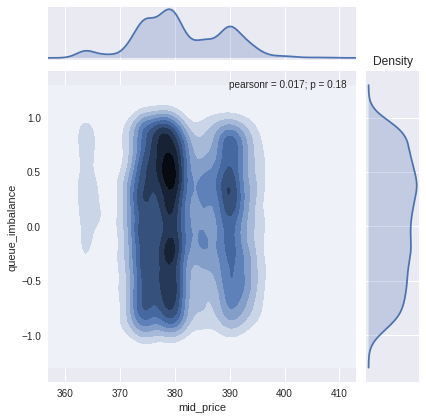

In [37]:
s = worst_stocks[0]
sns.jointplot(x="mid_price", y="queue_imbalance", data=dfs[s].loc[:, ['mid_price', 'queue_imbalance']], kind="kde")
plt.title('Density')
plt.plot()

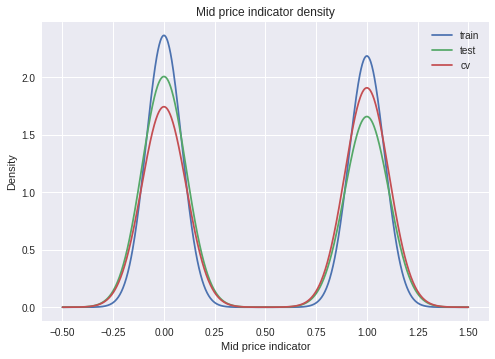

In [38]:
s = worst_stocks[0]
dfs[s]['mid_price_indicator'].plot('kde', label='train')
dfs_test[s]['mid_price_indicator'].plot('kde', label='test')
dfs_cv[s]['mid_price_indicator'].plot('kde', label='cv')
plt.legend()
plt.xlabel('Mid price indicator')
plt.title('Mid price indicator density')

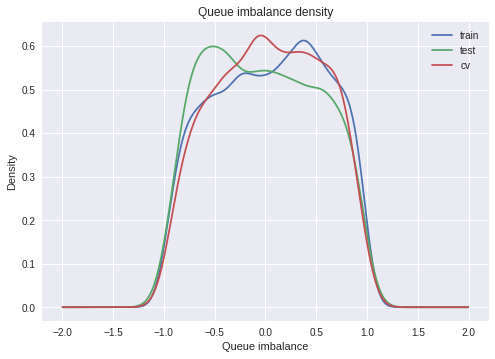

In [39]:
s = worst_stocks[0]

dfs[s]['queue_imbalance'].plot('kde', label='train')
dfs_test[s]['queue_imbalance'].plot('kde', label='test')
dfs_cv[s]['queue_imbalance'].plot('kde', label='cv')
plt.legend()
plt.xlabel('Queue imbalance')
plt.title('Queue imbalance density')

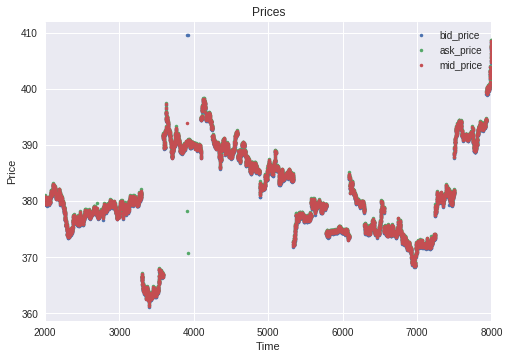

In [40]:
dfs[s][['bid_price', 'ask_price', 'mid_price']].plot(style='.')
plt.legend()
plt.title('Prices')
plt.xlabel('Time')
plt.ylabel('Price')

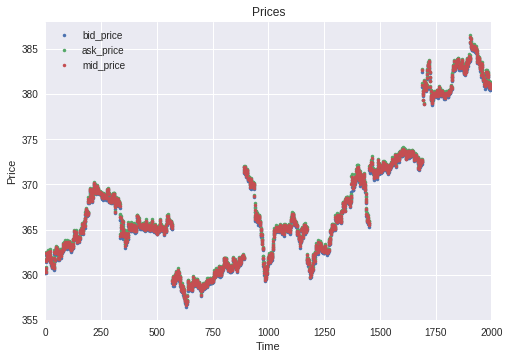

In [41]:
dfs_test[s][['bid_price', 'ask_price', 'mid_price']].plot(style='.')
plt.legend()
plt.title('Prices')
plt.xlabel('Time')
plt.ylabel('Price')

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
s = worst_stocks[0]
X = dfs[s]['queue_imbalance'].reshape(-1, 1)
kde = KernelDensity(kernel='gaussian').fit(X)
log_dens = kde.score_samples(X)
print(log_dens)


[-1.0563806  -1.05757224 -1.11517671 ..., -1.10472527 -1.24266766
 -1.05447837]


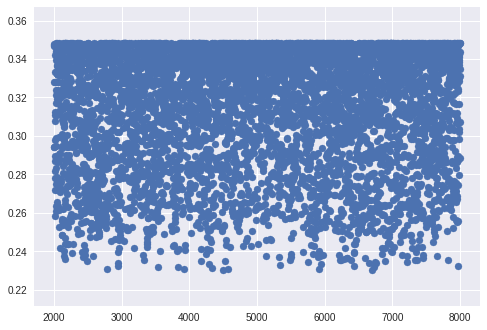

In [43]:
plt.scatter(dfs[s].index, np.exp(log_dens))

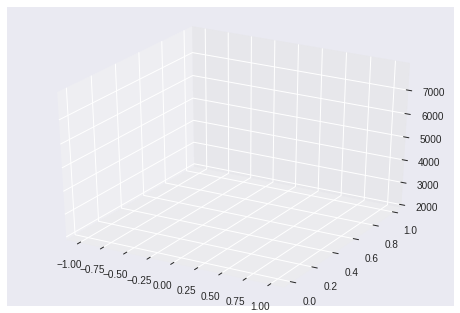

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =  dfs[s]['queue_imbalance'].values
y = dfs[s]['mid_price_indicator'].values

#x, y = np.meshgrid(np.exp(log_dens), dfs[s]['queue_imbalance'].values)

ax.plot_surface(x, y, dfs[s].index)
